# Vehicle insurance Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
#checking description of numeric type
data.describe().style.background_gradient(cmap = 'copper')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
#checking description of object types
data.describe(include= 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


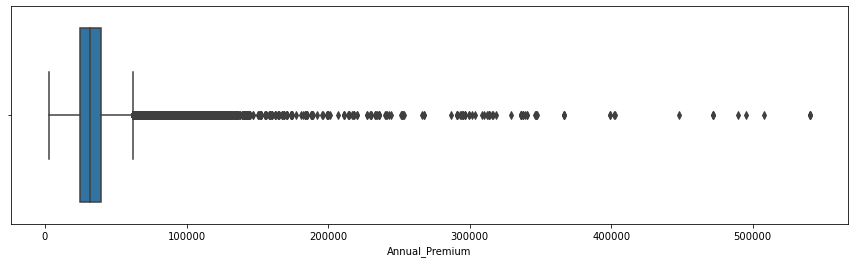

In [9]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.boxplot(data['Annual_Premium'])
plt.show()

In [10]:
# lets remove outliers from data

#lets check the shape before removing outliers 
print('Before removing Outliers ', data.shape)

# lets fiter thr records having more than 150000 annual premium 
data = data[data['Annual_Premium'] < 150000]

# lets check the shape after removing outliers
print('After removing Outliers ' , data.shape)

Before removing Outliers  (381109, 12)
After removing Outliers  (380918, 12)


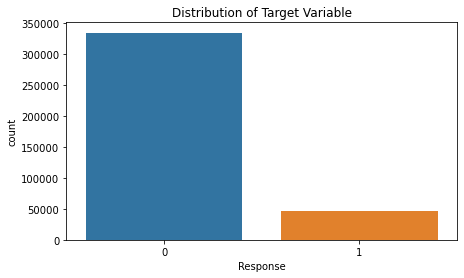

In [11]:
plt.rcParams['figure.figsize']=7,4
sns.countplot(data['Response'])
plt.title('Distribution of Target Variable')
plt.show()

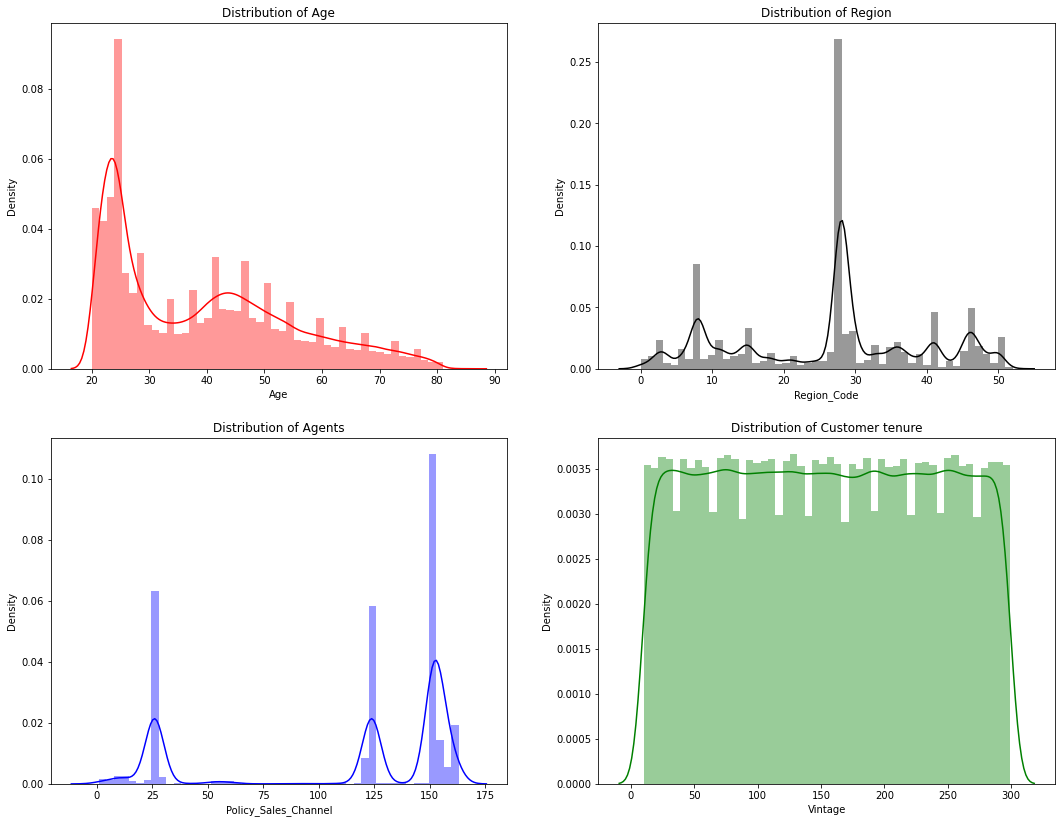

In [12]:
plt.rcParams['figure.figsize'] = 18,14
plt.subplot(221)
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age')

plt.subplot(222)
sns.distplot(data['Region_Code'] , color = 'black')
plt.title('Distribution of Region')

plt.subplot(223)
sns.distplot(data['Policy_Sales_Channel'], color = 'blue')
plt.title('Distribution of Agents')

plt.subplot(224)
sns.distplot(data['Vintage'],color='green')
plt.title('Distribution of Customer tenure')
plt.show()

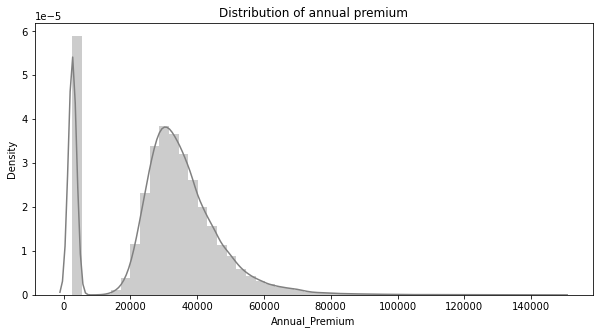

In [13]:
plt.rcParams['figure.figsize']=10,5
sns.distplot(data['Annual_Premium'], color = 'grey')
plt.title('Distribution of annual premium')
plt.show()

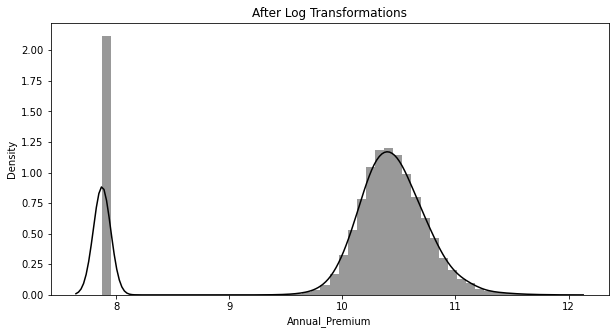

In [14]:
#lets remove skewness from Annual Premium, as it can add bias to the data

# lets apply log transformation to remove skewness
data['Annual_Premium'] = np.log1p(data['Annual_Premium'])

# lets plot them and check whether the skewness is removed or not
plt.rcParams['figure.figsize']=10,5
sns.distplot(data['Annual_Premium'], color = 'black')
plt.title('After Log Transformations')
plt.show()

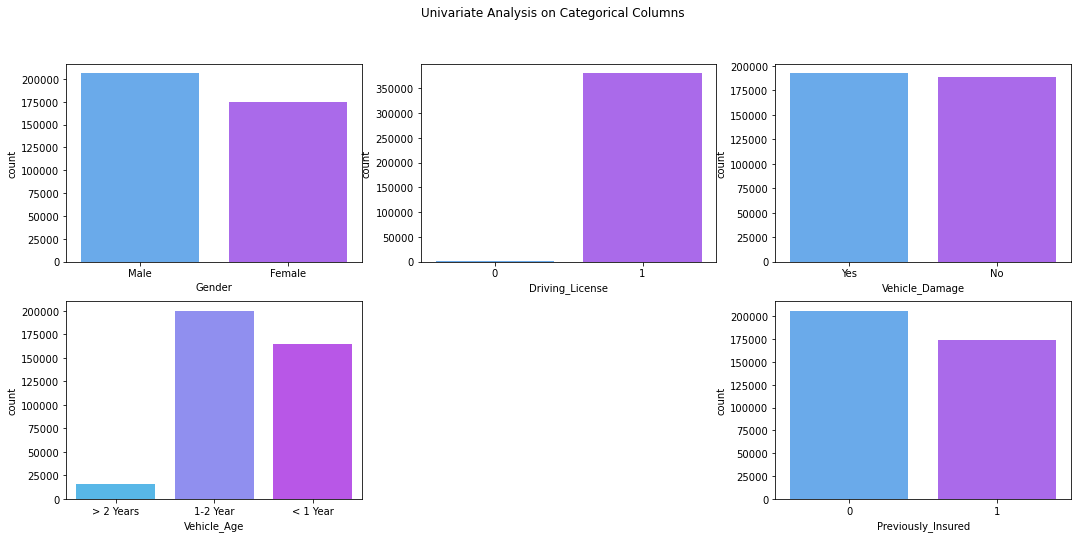

In [15]:
## Univariate Analysis on Categorical Columns

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2, 3, 1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2, 3, 2)
sns.countplot(data['Driving_License'], palette = 'cool')

plt.subplot(2, 3, 3)
sns.countplot(data['Vehicle_Damage'], palette = 'cool')

plt.subplot(2, 3, 4)
sns.countplot(data['Vehicle_Age'], palette = 'cool')

plt.subplot(2, 3, 6)
sns.countplot(data['Previously_Insured'], palette = 'cool')

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

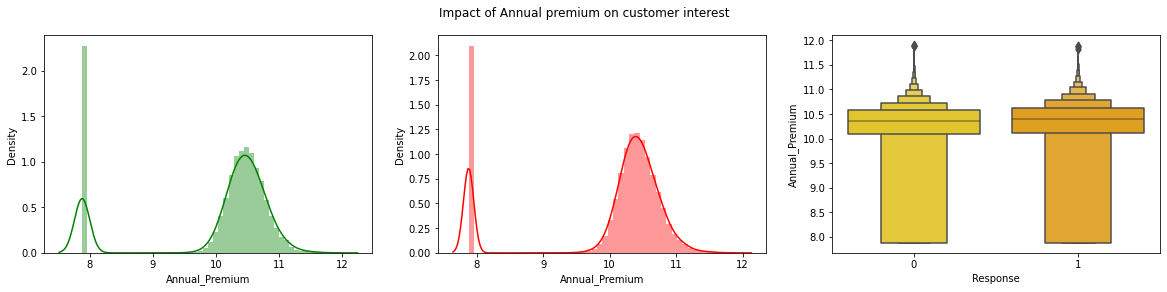

In [16]:
### Lets check the Impact of Annual premium on customer response

plt.rcParams['figure.figsize'] = (20, 4)
plt.subplot(131)
sns.distplot(data[data['Response']==1]['Annual_Premium'], color='green')

plt.subplot(132)
sns.distplot(data[data['Response']==0]['Annual_Premium'], color='red')

plt.subplot(133)
sns.boxenplot(data['Response'], data['Annual_Premium'], palette = 'Wistia')

plt.suptitle('Impact of Annual premium on customer interest')
plt.show()

#Annual premium doesn't have any influence on customer's interest

In [17]:
print("Impact of Gender on Customer interest")
print(pd.crosstab(data['Response'], data['Gender']))
print('\n')

print("Impact of Previously_Insured on Customer interest")
print(pd.crosstab(data['Response'], data['Previously_Insured']))
print('\n')

print("Impact of Vehicle_Age on Customer interest")
print(pd.crosstab(data['Response'], data['Vehicle_Age']))
print('\n')

print("Impact of Vehicle_Damage on Customer interest")
print(pd.crosstab(data['Response'], data['Vehicle_Damage']))
print('\n')

print("Impact of Driving_License on Customer interest")
print(pd.crosstab(data['Response'], data['Driving_License']))
print('\n')

Impact of Gender on Customer interest
Gender    Female    Male
Response                
0         156746  177495
1          18176   28501


Impact of Previously_Insured on Customer interest
Previously_Insured       0       1
Response                          
0                   159842  174399
1                    46519     158


Impact of Vehicle_Age on Customer interest
Vehicle_Age  1-2 Year  < 1 Year  > 2 Years
Response                                  
0              165417    157527      11297
1               34780      7199       4698


Impact of Vehicle_Damage on Customer interest
Vehicle_Damage      No     Yes
Response                      
0               187632  146609
1                  982   45695


Impact of Driving_License on Customer interest
Driving_License    0       1
Response                    
0                771  333470
1                 41   46636




Male showing more interest than female.
customers who already insured are not showing interest.
if the vehicle age is between 1-2 years are showing much intrest than other 2 categories.
customers with past vehicle damage experience are showing interest.
customer withour driving license are not showing interest.

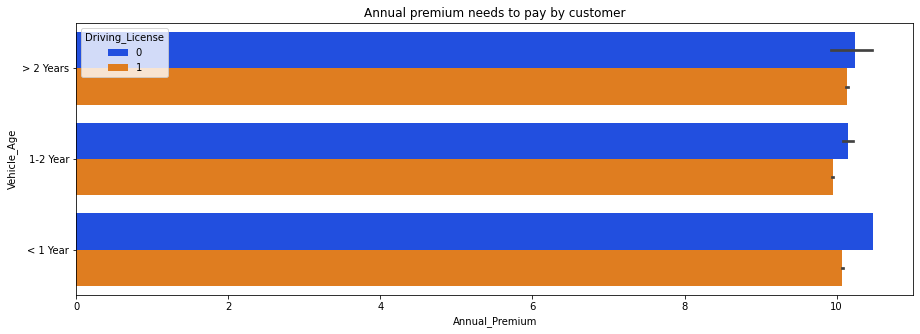

In [18]:
plt.rcParams['figure.figsize']=15,5
sns.barplot(y=data['Vehicle_Age'], x=data['Annual_Premium'], hue=data['Driving_License'], palette='bright')
plt.title('Annual premium needs to pay by customer')
plt.show()

Customer with driving lisense are paying lesser annual premium than customer without driving lisense
For customers with DL, their average annual premium varies based on the vehicle age
For customers without DL, their average annual premium doesn't varies much based on the vehicle age.

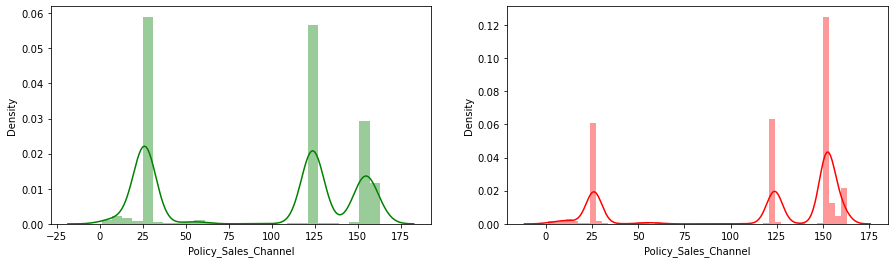

In [19]:
plt.rcParams['figure.figsize']=15,4
plt.subplot(121)
sns.distplot(data[data['Response']==1]['Policy_Sales_Channel'], color='green')

plt.subplot(122)
sns.distplot(data[data['Response']==0]['Policy_Sales_Channel'], color='red')

plt.show()

More record are from 26, 124, and 156.
The ratio of customer showing interest is higher than not showing interest in policy channel 26.
The ratio of customer showing interest is very low than not showing interest in policy channel 156.

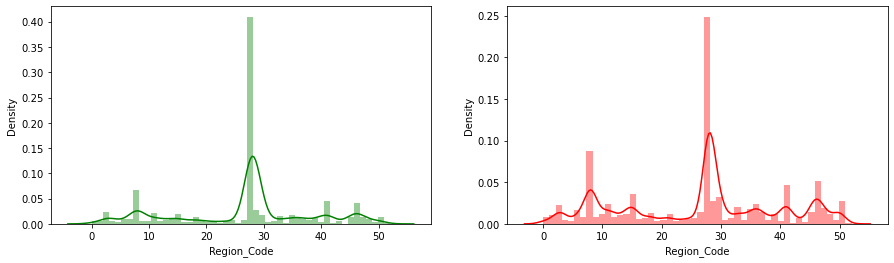

In [20]:
plt.rcParams['figure.figsize']=15,4
plt.subplot(121)
sns.distplot(data[data['Response']==1]['Region_Code'], color='green')

plt.subplot(122)
sns.distplot(data[data['Response']==0]['Region_Code'], color='red')

plt.show()

Region doesn't have any influence on customers interest on insurance

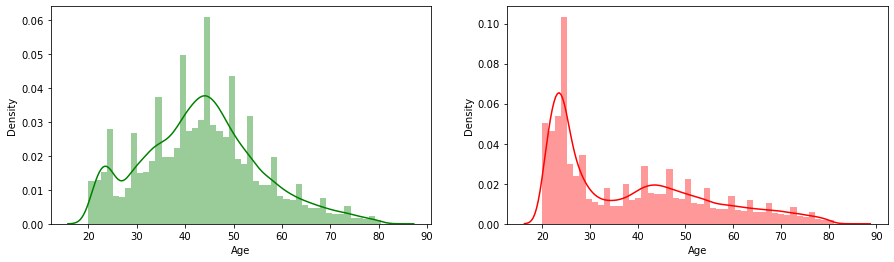

In [21]:
plt.rcParams['figure.figsize']=15,4
plt.subplot(121)
sns.distplot(data[data['Response']==1]['Age'], color='green')

plt.subplot(122)
sns.distplot(data[data['Response']==0]['Age'], color='red')

plt.show()


Customers at age 40 to 50 are showing more interest on insurance policy
Customers between 20 and 30 age are not much interested on insurance policy

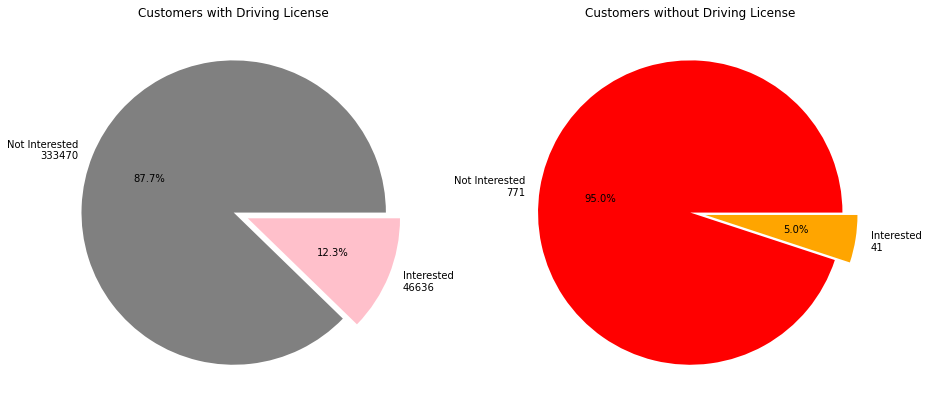

In [22]:
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(121)
plt.pie(data[(data['Driving_License']==1)]['Response'].value_counts(),
        labels=[f'Not Interested\n{len(data[(data.Driving_License==1)&(data.Response==0)])}',
                f'Interested\n{len(data[(data.Driving_License==1)&(data.Response==1)])}'], autopct='%1.1f%%',
       explode=[0,0.1], colors = ['grey','pink'])
plt.title('Customers with Driving License')

plt.subplot(122)
plt.pie(data[(data['Driving_License']==0)]['Response'].value_counts(),
        labels=[f'Not Interested\n{len(data[(data.Driving_License==0)&(data.Response==0)])}',
                f'Interested\n{len(data[(data.Driving_License==0)&(data.Response==1)])}'], autopct='%1.1f%%',
       explode=[0,0.1], colors = ['red','orange'])
plt.title('Customers without Driving License')
plt.show()

In [23]:
from ipywidgets import interact_manual
@interact_manual
def viz(x=list(data.select_dtypes('number').columns)):
   plt.rcParams['figure.figsize']=15,4
   plt.subplot(121)
   sns.distplot(data[data['Response']==1][x], color='green')
   plt.subplot(122)
   sns.distplot(data[data['Response']==0][x], color='red')

interactive(children=(Dropdown(description='x', options=('id', 'Age', 'Driving_License', 'Region_Code', 'Previ…

#  Data Preparation

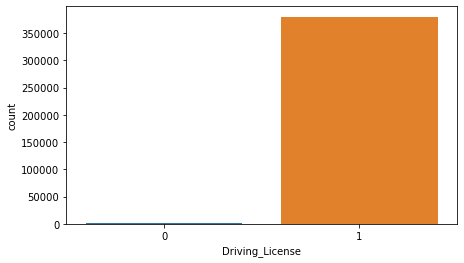

In [24]:
plt.rcParams['figure.figsize']=7,4
sns.countplot(data['Driving_License'])
plt.show()

In [25]:
# removing id and dl
data.drop(['id','Driving_License'], axis=1, inplace=True)

In [26]:
#lets encode the object columns
data['Gender'] = data['Gender'].replace(('Male','Female'),(1, 0))
data['Vehicle_Age'] = data['Vehicle_Age'].replace(('< 1 Year','1-2 Year','> 2 Years'),(0,1,2))
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace(('Yes','No'),(1, 0))

# lets check whether there is any object column left
data.select_dtypes('object').columns

Index([], dtype='object')

In [27]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28.0,0,2,1,10.607946,26.0,217,1
1,1,76,3.0,0,1,0,10.420405,26.0,183,0
2,1,47,28.0,0,2,1,10.553075,26.0,27,1
3,1,21,11.0,1,0,0,10.261861,152.0,203,0
4,0,29,41.0,1,0,0,10.221832,152.0,39,0


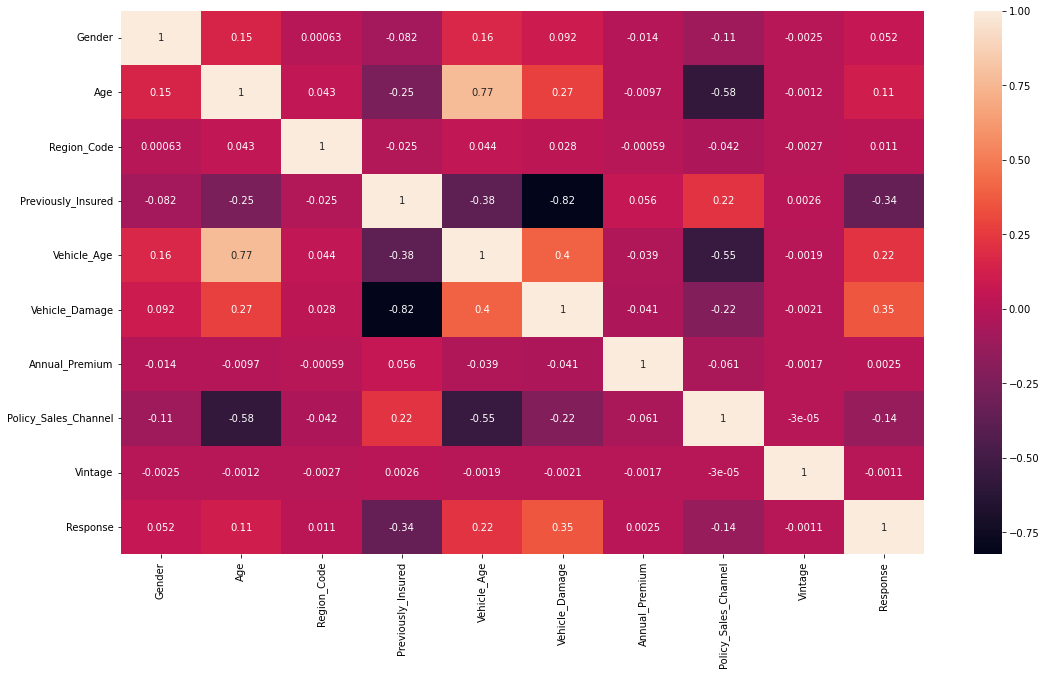

In [28]:
plt.rcParams['figure.figsize']=18,10
sns.heatmap(data.corr(), annot=True)
plt.show()

In [29]:
# lets split the Target column from the Data

y = data['Response']
x = data.drop(['Response'], axis = 1)

# lets check the shape of x and y
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (380918, 9)
Shape of y : (380918,)


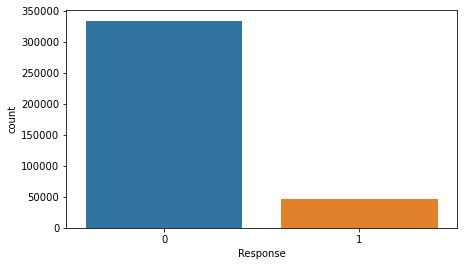

In [30]:
plt.rcParams['figure.figsize']=7,4
sns.countplot(data['Response'])
plt.show()

In [31]:
from imblearn.combine import SMOTETomek

x_resample, y_resample  = SMOTETomek().fit_resample(x, y)

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(657098, 9)
(657098,)


In [32]:
# lets also check the value counts of our target variable

# print("Before Resampling :")
# print(y.value_counts())

# print("After Resampling :")
# y_resample = pd.DataFrame(y_resample)
# print(y_resample.value_counts())

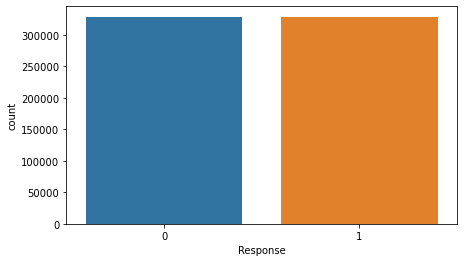

In [33]:
plt.rcParams['figure.figsize']=7,4
sns.countplot(y_resample)
plt.show()

In [34]:
# lets split the test data from the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (525678, 9)
Shape of the y Train : (525678,)
Shape of the x Test : (131420, 9)
Shape of the y Test : (131420,)


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,verbose=1,n_jobs=-1)
rfc_model.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.9s finished


RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0,
                       verbose=1)

In [37]:
y_pred = rfc_model.predict(x_test)
y_pred

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

<AxesSubplot:ylabel='count'>

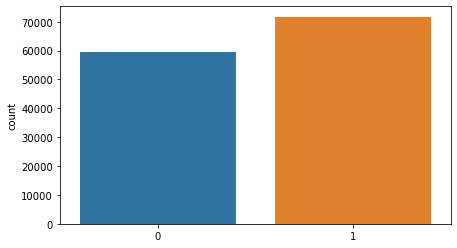

In [38]:
sns.countplot(y_pred)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     59672
           1       0.93      0.86      0.89     71748

    accuracy                           0.89    131420
   macro avg       0.89      0.89      0.89    131420
weighted avg       0.89      0.89      0.89    131420



# saving model

In [40]:
import pickle

filename = 'Vehicle_Insurance_classif.sav'
pickle.dump(rfc_model,open(filename,'wb'))